In [ ]:
# Mall Customers Segmentation Using Clustering Algorithms

# This project applies clustering techniques to segment mall customers based on
# their age, annual income, and spending score. The aim is to uncover patterns in
# customer behavior to help with targeted marketing strategies.


# Key Highlights:

# Dataset: Mall Customers dataset with 200 entries including Age, Gender, Annual Income, and Spending Score.
# Algorithms Used: K-Means Clustering, Agglomerative (Hierarchical) Clustering.
# Data Preprocessing: Handled gender encoding, feature scaling with StandardScaler, and feature selection using VarianceThreshold.
# Evaluation: Used the Elbow method to find the optimal number of clusters, and the Silhouette score to evaluate cluster quality.
# Results: Clustered customers into 5 optimal segments using both K-Means and Hierarchical Clustering, with visualization and
# comparison of model performance.


# Tools & Libraries:

# Python, Pandas, NumPy, Matplotlib, Seaborn
# Scikit-learn (KMeans, AgglomerativeClustering, StandardScaler, GridSearchCV)
# Silhouette score and Elbow method for model evaluation.

Import libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [32]:
url = "https://raw.githubusercontent.com/shridhar1504/Mall-Customers-Clustering-DataScience-Project/refs/heads/main/Dataset/Mall_Customers.csv"
df = pd.read_csv(url)

 Display the first few rows

In [33]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Data Preprocessing and EDA

In [34]:
# Checking the data types and null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [35]:
# Statistical summary
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [36]:
# Renaming columns for easier handling
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income_k$', 'Spending_Score_1_100']

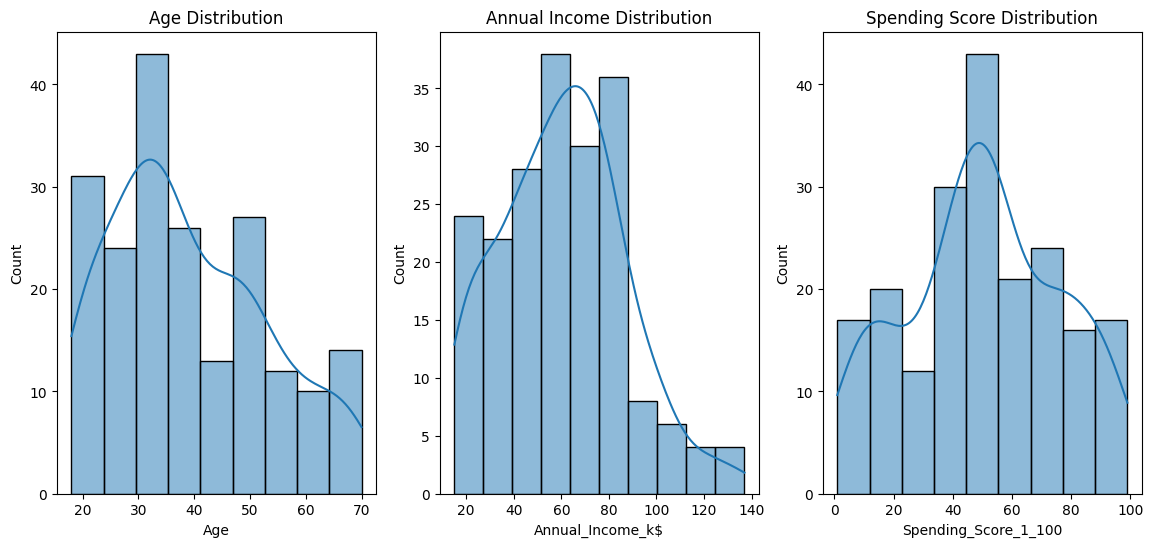

In [37]:
# Visualize the distribution of Age, Annual Income, and Spending Score
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income_k$'], kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score_1_100'], kde=True)
plt.title('Spending Score Distribution')

plt.show()

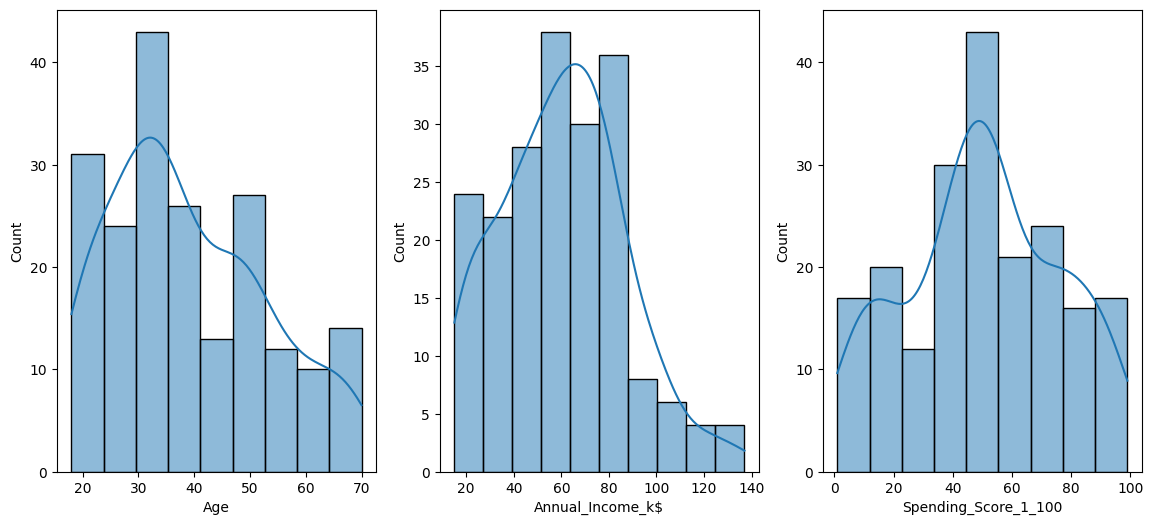

In [38]:
# Alternate way using loop
x=['Age','Annual_Income_k$','Spending_Score_1_100']
i=1
plt.figure(figsize=(14,6))
for j in x:
    plt.subplot(1, 3, i)
    sns.histplot(df[j], kde=True)
    i+=1

plt.show()

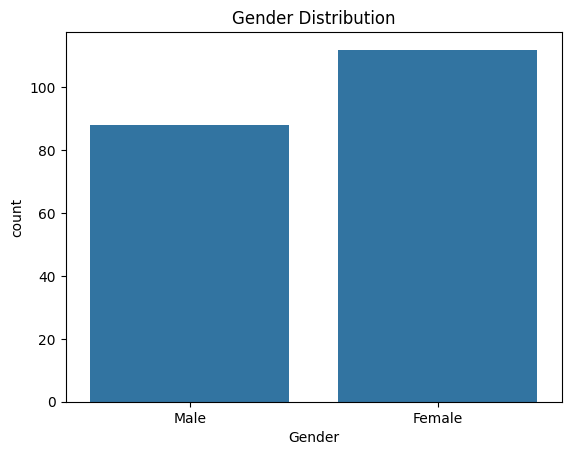

In [39]:
# Check distribution of Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

Data Preprocessing

In [40]:
# Encode Gender column (Male: 1, Female: 0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Drop CustomerID column as it's not relevant for clustering
df.drop('CustomerID', axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled.head())  # Display scaled data


     Gender       Age  Annual_Income_k$  Spending_Score_1_100
0  1.128152 -1.424569         -1.738999             -0.434801
1  1.128152 -1.281035         -1.738999              1.195704
2 -0.886405 -1.352802         -1.700830             -1.715913
3 -0.886405 -1.137502         -1.700830              1.040418
4 -0.886405 -0.563369         -1.662660             -0.395980


Feature Selection using SelectKBest

In [41]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold to remove features with low variance
selector = VarianceThreshold(threshold=0.1)  # Set your own threshold
X_selected = selector.fit_transform(X)

# Get selected features
selected_features = df.columns[selector.get_support()]
print(selected_features)

Index(['Gender', 'Age', 'Annual_Income_k$', 'Spending_Score_1_100'], dtype='object')


K-Means Clustering

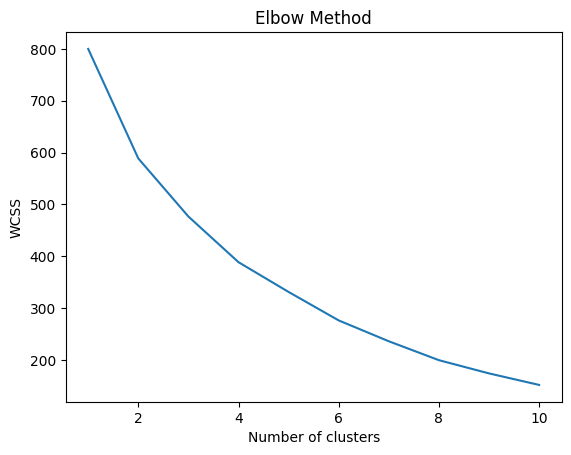

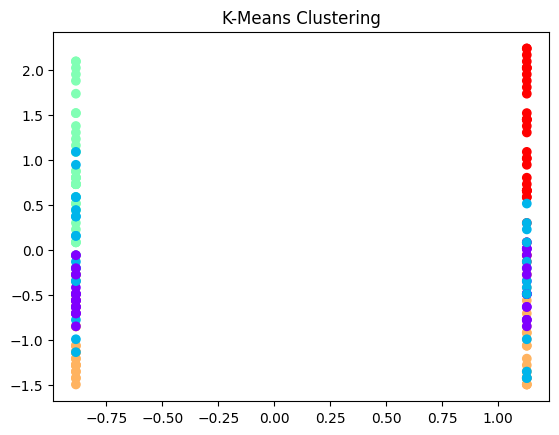

KMeans Silhouette Score: 0.3040600988258827


In [42]:
# Using the Elbow method to determine the number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_selected)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means clustering with the optimal number of clusters (let's assume k=5 based on the elbow plot)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_selected)

# Add the cluster labels to the original dataset
df['KMeans_Cluster'] = y_kmeans

# Plotting clusters
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_kmeans, cmap='rainbow')
plt.title('K-Means Clustering')
plt.show()

# Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(X_selected, y_kmeans)
print(f"KMeans Silhouette Score: {kmeans_silhouette}")


Hierarchical Clustering

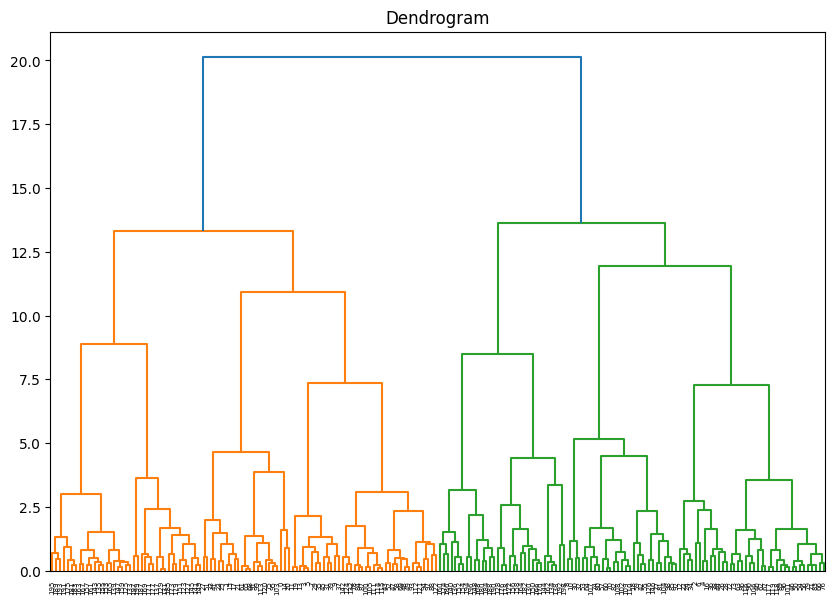

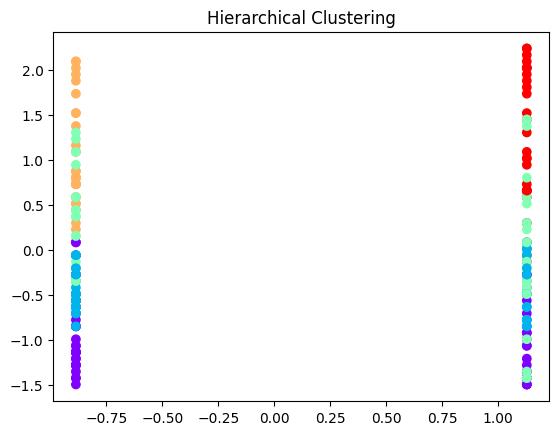

Hierarchical Clustering Silhouette Score: 0.28699413201651747


In [44]:
# Using dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(X_selected, method='ward'))
plt.show()

# Fit the Agglomerative Clustering with an optimal number of clusters (say 5 from dendrogram)
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X_selected)

# Add the cluster labels to the original dataset
df['Hierarchical_Cluster'] = y_hc

# Plotting clusters
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y_hc, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()

# Silhouette Score for Hierarchical Clustering
hc_silhouette = silhouette_score(X_selected, y_hc)
print(f"Hierarchical Clustering Silhouette Score: {hc_silhouette}")


Hyperparameter Tuning and Final Score Comparison

                     Model  Silhouette Score
0                  K-Means          0.304060
1  Hierarchical Clustering          0.286994


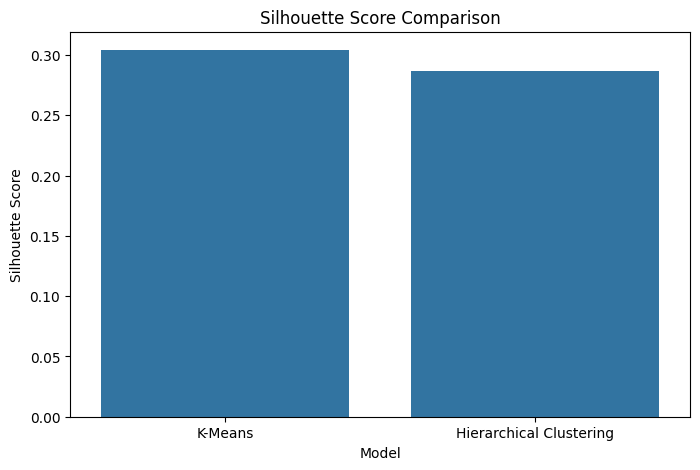

In [45]:
# Final score comparison
scores = {'Model': ['K-Means', 'Hierarchical Clustering'],
          'Silhouette Score': [kmeans_silhouette, hc_silhouette]}

score_df = pd.DataFrame(scores)
print(score_df)

# Bar chart comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Silhouette Score', data=score_df)
plt.title('Silhouette Score Comparison')
plt.show()


Best K-Means Silhouette Score: 0.2518152915788437
Best K-Means Params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}
Best Hierarchical Clustering Silhouette Score: 0.4176254448686808
Best Hierarchical Clustering Params: n_clusters=10, linkage=ward
                     Model  Silhouette Score
0                  K-Means          0.251815
1  Hierarchical Clustering          0.417625


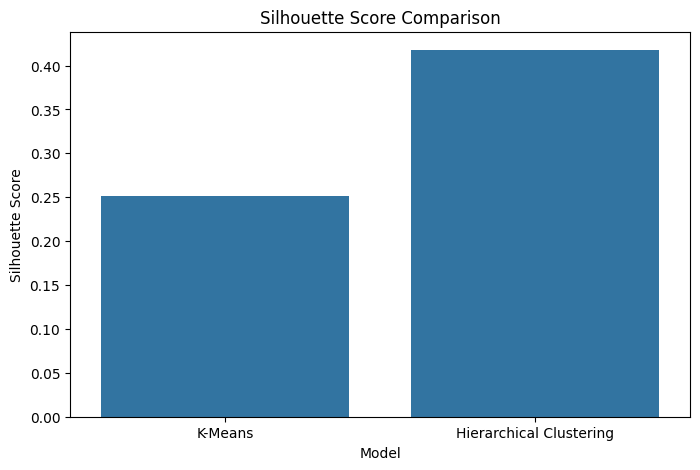

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Custom function to calculate silhouette score for GridSearchCV
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Hyperparameter tuning for K-Means
kmeans_params = {'n_clusters': range(2, 11),  # Trying different cluster numbers
                 'init': ['k-means++', 'random'],
                 'n_init': [10, 20],  # Number of times the algorithm will run
                 'max_iter': [300, 500]}

kmeans = KMeans(random_state=42)
grid_kmeans = GridSearchCV(kmeans, kmeans_params, scoring=make_scorer(silhouette_scorer), cv=3)
grid_kmeans.fit(X_selected)

best_kmeans = grid_kmeans.best_estimator_
kmeans_silhouette = silhouette_score(X_selected, best_kmeans.labels_)
print(f"Best K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Best K-Means Params: {grid_kmeans.best_params_}")

# Hyperparameter tuning for Hierarchical Clustering
hierarchical_params = {'n_clusters': range(2, 11),  # Trying different cluster numbers
                       'affinity': ['euclidean', 'manhattan'],
                       'linkage': ['ward', 'complete', 'average']}

hc = AgglomerativeClustering()
best_hc_score = -1
best_hc_model = None

# Manual tuning loop for Hierarchical Clustering since GridSearchCV does not support fit_predict
for n_clusters in hierarchical_params['n_clusters']:
    for affinity in hierarchical_params['affinity']:
        for linkage in hierarchical_params['linkage']:
            if linkage == 'ward':
    # For 'ward' linkage, no need for 'affinity' or 'metric', as it defaults to Euclidean
                    hc_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            else:
    # For other linkage methods, replace 'affinity' with 'metric'
                    hc_model = AgglomerativeClustering(n_clusters=n_clusters, metric=affinity, linkage=linkage)
            labels = hc_model.fit_predict(X_selected)
            score = silhouette_score(X_selected, labels)

            if score > best_hc_score:
                best_hc_score = score
                best_hc_model = hc_model

hc_silhouette = best_hc_score
print(f"Best Hierarchical Clustering Silhouette Score: {hc_silhouette}")
if best_hc_model.linkage == 'ward':
    # No metric/affinity for 'ward', only Euclidean distance
    print(f"Best Hierarchical Clustering Params: n_clusters={best_hc_model.n_clusters}, linkage={best_hc_model.linkage}")
else:
    # For other linkage methods, use 'metric' instead of 'affinity'
    print(f"Best Hierarchical Clustering Params: n_clusters={best_hc_model.n_clusters}, metric={best_hc_model.metric}, linkage={best_hc_model.linkage}")


# Final score comparison
scores = {'Model': ['K-Means', 'Hierarchical Clustering'],
          'Silhouette Score': [kmeans_silhouette, hc_silhouette]}

score_df = pd.DataFrame(scores)
print(score_df)

# Bar chart comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Silhouette Score', data=score_df)
plt.title('Silhouette Score Comparison')
plt.show()
